In [13]:
from time import time
import numpy as np
import scipy.sparse as sps
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


%matplotlib inline

data = np.genfromtxt('web-Stanford.txt', dtype=[('FromNodeId', np.intp),
                                        ('ToNodeId', np.intp)])
P = sps.csr_matrix((np.ones(len(data)), (data['FromNodeId']-1, data['ToNodeId']-1)))

In [14]:
P += sps.identity(P.shape[0])

In [15]:
P = normalize(P, axis=0, norm='l1')

In [16]:
def result_function(x, P):
    return ((x - P.T@x)**2).sum()
def gradient(x, P):
    I = sps.identity(P.shape[0])
    return 2*(x - P.T@x).T@(I - P)

In [17]:
def SFW_step(x, k, gradient):
    one_ind = np.argmin(gradient)
    v = np.zeros_like(gradient)
    v[one_ind] = 1.
    
    gamma = 2./(k + 2.)
    x = (1 - gamma)*x + gamma*v
    return x

In [25]:
x = np.ones((P.shape[0]))
x = x/len(x)
losses = []
loss = result_function(x, P)
losses.append(loss)
times = [0]
start_time = time()

for step in tqdm(range(250)):
    grad = gradient(x, P)
    x = SFW_step(x, step, grad)
    loss = result_function(x, P)
    losses.append(loss)
    times.append(round(time() - start_time))

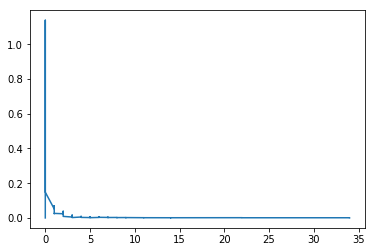

In [26]:
plt.plot(times, losses)

In [27]:
np.save('pagerank/losses_FW.npy', losses[1:])
np.save('pagerank/times_FW.npy', times[1:])